# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
230825,0.7983,0.0513,0.8862,0.8032,0.1025,0.1343,0.6738,0.5249,0.8887,0.0757,5,5,16,16
205408,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0903,0.0024,0.0439,5,0,13,13
113331,0.1489,0.9351,0.1294,0.0073,0.0024,0.0293,1.7554,0.3931,0.4272,1.2085,5,5,2,2
156006,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0610,0.0024,0.1221,6,0,7,7
420019,0.0024,0.0049,0.0171,0.0024,0.0024,0.0024,0.0049,0.1270,0.0757,0.0122,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [46]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(768, activation='relu')(visible)
hidden2 = Dense(384, activation='relu')(hidden1)
hidden3 = Dense(384, activation='relu')(hidden2)
hidden4 = Dense(192, activation='relu')(hidden3)
hidden5 = Dense(192, activation='relu')(hidden4)
output = Dense(num_classes, activation='softmax')(hidden5)
model = Model(inputs=visible, outputs=output)

In [47]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_22 (Dense)            (None, 768)               8448      
                                                                 
 dense_23 (Dense)            (None, 384)               295296    
                                                                 
 dense_24 (Dense)            (None, 384)               147840    
                                                                 
 dense_25 (Dense)            (None, 192)               73920     
                                                                 
 dense_26 (Dense)            (None, 192)               37056     
                                                                 
 dense_27 (Dense)            (None, 24)                4632

# 2. Compile Network

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [50]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 1s 10ms/step - loss: 1.4875 - accuracy: 0.6355 - val_loss: 1.0872 - val_accuracy: 0.7101
Epoch 2/300
75/75 [==============================] - 0s 5ms/step - loss: 0.9679 - accuracy: 0.7382 - val_loss: 0.8923 - val_accuracy: 0.7577
Epoch 3/300
75/75 [==============================] - 0s 5ms/step - loss: 0.8259 - accuracy: 0.7751 - val_loss: 0.7799 - val_accuracy: 0.7828
Epoch 4/300
75/75 [==============================] - 0s 6ms/step - loss: 0.7471 - accuracy: 0.7950 - val_loss: 0.7186 - val_accuracy: 0.8004
Epoch 5/300
75/75 [==============================] - 0s 5ms/step - loss: 0.6752 - accuracy: 0.8113 - val_loss: 0.6622 - val_accuracy: 0.8129
Epoch 6/300
75/75 [==============================] - 0s 5ms/step - loss: 0.6353 - accuracy: 0.8215 - val_loss: 0.6226 - val_accuracy: 0.8229
Epoch 7/300
75/75 [==============================] - 0s 5ms/step - loss: 0.6044 - accuracy: 0.8293 - val_loss: 0.6111 - val_accuracy: 0.8273
Epoch 8/300


Epoch 59/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2754 - accuracy: 0.9212 - val_loss: 0.3242 - val_accuracy: 0.9069
Epoch 60/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2732 - accuracy: 0.9218 - val_loss: 0.3298 - val_accuracy: 0.9051
Epoch 61/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2749 - accuracy: 0.9213 - val_loss: 0.3369 - val_accuracy: 0.9047
Epoch 62/300
75/75 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 0.9220 - val_loss: 0.3261 - val_accuracy: 0.9066
Epoch 63/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2697 - accuracy: 0.9226 - val_loss: 0.3270 - val_accuracy: 0.9045
Epoch 64/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2700 - accuracy: 0.9228 - val_loss: 0.3225 - val_accuracy: 0.9077
Epoch 65/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.9225 - val_loss: 0.3229 - val_accuracy: 0.9078
Epoch 

75/75 [==============================] - 0s 5ms/step - loss: 0.2087 - accuracy: 0.9412 - val_loss: 0.2935 - val_accuracy: 0.9184
Epoch 117/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2045 - accuracy: 0.9424 - val_loss: 0.2839 - val_accuracy: 0.9215
Epoch 118/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 0.9431 - val_loss: 0.2825 - val_accuracy: 0.9233
Epoch 119/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2063 - accuracy: 0.9419 - val_loss: 0.2972 - val_accuracy: 0.9193
Epoch 120/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2037 - accuracy: 0.9424 - val_loss: 0.2853 - val_accuracy: 0.9203
Epoch 121/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1992 - accuracy: 0.9442 - val_loss: 0.2841 - val_accuracy: 0.9210
Epoch 122/300
75/75 [==============================] - 0s 5ms/step - loss: 0.2009 - accuracy: 0.9434 - val_loss: 0.2806 - val_accuracy: 0.9229
Epoch 123/300

75/75 [==============================] - 0s 5ms/step - loss: 0.1783 - accuracy: 0.9497 - val_loss: 0.2786 - val_accuracy: 0.9265
Epoch 174/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1787 - accuracy: 0.9503 - val_loss: 0.2788 - val_accuracy: 0.9259
Epoch 175/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1741 - accuracy: 0.9515 - val_loss: 0.2675 - val_accuracy: 0.9295
Epoch 176/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1694 - accuracy: 0.9532 - val_loss: 0.2750 - val_accuracy: 0.9265
Epoch 177/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1725 - accuracy: 0.9519 - val_loss: 0.2703 - val_accuracy: 0.9287
Epoch 178/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1720 - accuracy: 0.9525 - val_loss: 0.2763 - val_accuracy: 0.9279
Epoch 179/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1748 - accuracy: 0.9511 - val_loss: 0.2845 - val_accuracy: 0.9258
Epoch 180/300

75/75 [==============================] - 0s 5ms/step - loss: 0.1528 - accuracy: 0.9577 - val_loss: 0.2673 - val_accuracy: 0.9319
Epoch 231/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1543 - accuracy: 0.9571 - val_loss: 0.2805 - val_accuracy: 0.9298
Epoch 232/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1601 - accuracy: 0.9557 - val_loss: 0.3088 - val_accuracy: 0.9239
Epoch 233/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1708 - accuracy: 0.9523 - val_loss: 0.3129 - val_accuracy: 0.9235
Epoch 234/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1641 - accuracy: 0.9541 - val_loss: 0.2884 - val_accuracy: 0.9286
Epoch 235/300
75/75 [==============================] - 0s 6ms/step - loss: 0.1563 - accuracy: 0.9568 - val_loss: 0.2712 - val_accuracy: 0.9318
Epoch 236/300
75/75 [==============================] - 0s 6ms/step - loss: 0.1479 - accuracy: 0.9594 - val_loss: 0.2652 - val_accuracy: 0.9333
Epoch 237/300

75/75 [==============================] - 0s 5ms/step - loss: 0.1432 - accuracy: 0.9603 - val_loss: 0.2834 - val_accuracy: 0.9311
Epoch 288/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1423 - accuracy: 0.9605 - val_loss: 0.2827 - val_accuracy: 0.9331
Epoch 289/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1406 - accuracy: 0.9611 - val_loss: 0.2807 - val_accuracy: 0.9331
Epoch 290/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1446 - accuracy: 0.9601 - val_loss: 0.2923 - val_accuracy: 0.9295
Epoch 291/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1474 - accuracy: 0.9594 - val_loss: 0.2827 - val_accuracy: 0.9312
Epoch 292/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1410 - accuracy: 0.9612 - val_loss: 0.2864 - val_accuracy: 0.9312
Epoch 293/300
75/75 [==============================] - 0s 5ms/step - loss: 0.1425 - accuracy: 0.9608 - val_loss: 0.2876 - val_accuracy: 0.9315
Epoch 294/300

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

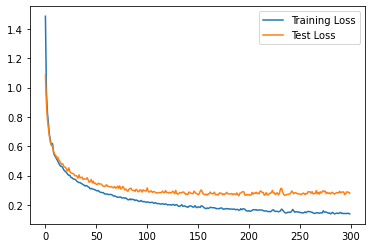

In [51]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

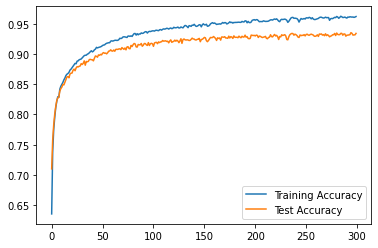

In [52]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 5s 2ms/step - loss: 0.2797 - accuracy: 0.9341


##  4.3 Make Predictions

In [ ]:
predictions = model.predict(X_test)

In [28]:
predictions

array([[9.9275303e-01, 1.3616631e-05, 1.3807783e-03, ..., 2.3818625e-08,
        6.8518304e-08, 4.8386478e-10],
       [1.1947462e-13, 1.3299005e-35, 3.3202073e-23, ..., 7.9151265e-14,
        1.8295718e-19, 1.1064859e-14],
       [8.3414096e-01, 1.7443927e-02, 9.4191935e-03, ..., 1.3900648e-09,
        1.0652984e-06, 1.9014693e-05],
       ...,
       [2.4474133e-04, 1.9146828e-06, 6.2104590e-07, ..., 5.3137592e-11,
        3.6975422e-08, 6.6825581e-09],
       [9.0934199e-01, 2.9233594e-03, 6.8358101e-02, ..., 4.1974619e-08,
        1.0052432e-04, 6.0242630e-11],
       [1.0129639e-04, 1.0141373e-06, 6.3420017e-03, ..., 1.7558632e-12,
        3.8963350e-11, 8.9714130e-12]], dtype=float32)